In [3]:
import numpy as np

In [20]:
from iou import calculate_iou

In [32]:
array = np.array([[13.70101796, 4.57136452, -0.74235851, 4.433886, 1.823255, 2.0, 
                   0.54469167, 0.0, 0.0, 0.0],
                  [8.7468731, -6.28502669, -0.84568863, 0.972283, 0.767881, 1.714062, 
                   0.32944867, 0.0, 0.0, 0.0]])

In [1]:
from trackm import KF, Filter, associate_detections_to_trackers


In [4]:
det = [np.array([13.87061676,  4.66908187, -0.64779444,  4.433886  ,  1.823255  ,
        2.        ,  0.55076867,  2.        ,  1.        ]), np.array([ 8.44675182, -6.33586244, -0.78998267,  0.972283  ,  0.767881  ,
        1.714062  ,  0.31604367,  0.        ,  1.        ])]
trk = [np.array([13.70101796,  4.57136452, -0.74235851,  4.433886  ,  1.823255  ,
        2.        ,  0.54469167,  0.        ,  0.        ,  0.        ]), np.array([ 8.7468731 , -6.28502669, -0.84568863,  0.972283  ,  0.767881  ,
        1.714062  ,  0.32944867,  0.        ,  0.        ,  0.        ])]

In [19]:
matches, unmatched_detections, unmatched_trackers = associate_detections_to_trackers(trk, trk, iou_threshold=0.3)

print(f"Matches: {matches}")
print(f"Unmatched Detections: {unmatched_detections}")
print(f"Unmatched Trackers: {unmatched_trackers}")   

0.4424853971774083
-0.9170754054632348
-0.9170754054632348
0.7273276954758116
iou_matrix :[[ 0.4424854 -0.9170754]
 [-0.9170754  0.7273277]]
Matches: [[0 0]
 [1 1]]
Unmatched Detections: []
Unmatched Trackers: []


In [10]:
det[0][:7]

array([13.87061676,  4.66908187, -0.64779444,  4.433886  ,  1.823255  ,
        2.        ,  0.55076867])

In [24]:
import numpy as np

def sutherland_hodgman_clip(subject_polygon, clip_polygon):
    """
    计算两个矩形形成的交集。输入排序的顶点坐标列表。
    输入坐标应按顺时针或逆时针排序。
    输出坐标为逆时针排序。
    """
    def inside(p, edge_start, edge_end):
        # 检查点 p 是否在边 edge_start -> edge_end 的内部
        return (edge_end[0] - edge_start[0]) * (p[1] - edge_start[1]) > (edge_end[1] - edge_start[1]) * (p[0] - edge_start[0])

    def compute_intersection(p1, p2, p3, p4):
        # 计算两条边 p1->p2 和 p3->p4 的交点
        denom = (p1[0] - p2[0]) * (p3[1] - p4[1]) - (p1[1] - p2[1]) * (p3[0] - p4[0])
        if denom == 0:
            return None  # 平行或重叠，无交点
        x = ((p1[0] * p2[1] - p1[1] * p2[0]) * (p3[0] - p4[0]) - (p1[0] - p2[0]) * (p3[0] * p4[1] - p3[1] * p4[0])) / denom
        y = ((p1[0] * p2[1] - p1[1] * p2[0]) * (p3[1] - p4[1]) - (p1[1] - p2[1]) * (p3[0] * p4[1] - p3[1] * p4[0])) / denom
        return np.array([x, y])

    output_list = subject_polygon
    for i in range(len(clip_polygon)):
        input_list = output_list
        output_list = []
        if len(input_list) == 0:
            break
        edge_start = clip_polygon[i]
        edge_end = clip_polygon[(i + 1) % len(clip_polygon)]
        for j in range(len(input_list)):
            current_point = input_list[j]
            prev_point = input_list[(j - 1) % len(input_list)]
            if inside(current_point, edge_start, edge_end):
                if not inside(prev_point, edge_start, edge_end):
                    intersection = compute_intersection(prev_point, current_point, edge_start, edge_end)
                    if intersection is not None:
                        output_list.append(intersection)
                output_list.append(current_point)
            elif inside(prev_point, edge_start, edge_end):
                intersection = compute_intersection(prev_point, current_point, edge_start, edge_end)
                if intersection is not None:
                    output_list.append(intersection)

    return np.array(output_list)

# 示例
subject_polygon = np.array([[-0.69088665, -0.15058434], [0.15058434, -0.69088665], [0.69088665, 0.15058434], [-0.15058434, 0.69088665]])
clip_polygon = np.array([[-0.69088665, -0.15058434], [0.15058434, -0.69088665], [0.69088665, 0.15058434], [-0.15058434, 0.69088665]])

intersection = sutherland_hodgman_clip(subject_polygon, clip_polygon)
print(intersection)


[[-0.15058434  0.69088665]
 [-0.69088665 -0.15058434]
 [ 0.15058434 -0.69088665]
 [ 0.69088665  0.15058434]]


In [30]:
np.cos(np.pi/2)

6.123233995736766e-17

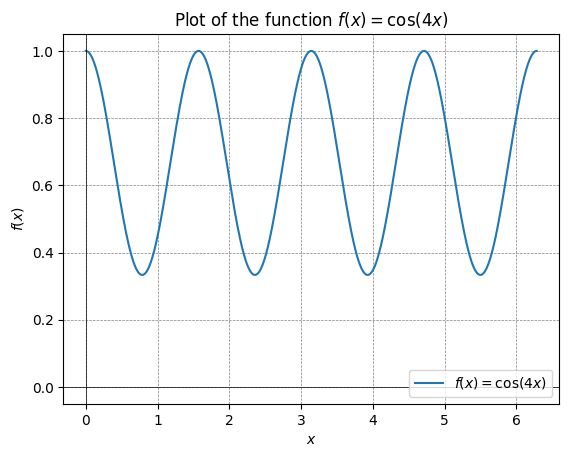

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def f(x):
    return (2+np.cos(4*x))/3

# 定义x的范围
x = np.linspace(0, 2 * np.pi, 1000)
y = f(x)

# 绘制函数图像
plt.plot(x, y, label=r'$f(x) = \cos(4x)$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title('Plot of the function $f(x) = \cos(4x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()


In [39]:
np.pi/2

1.5707963267948966